<a href="https://colab.research.google.com/github/parajulitilak/ML/blob/main/outliar_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***OUTLIER DETECTION***

importing the libraries
---

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

importing the datasets
---

In [83]:
dataset = pd.read_csv('sample_data/diabetes.csv')

**Showing head**

In [84]:
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


**Another method to set features and dependent variable**

In [85]:
features = dataset.drop('Outcome', axis=1)
features.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [86]:
target = dataset['Outcome']
print(target)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


In [87]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 48.1 KB


Seperating features and dependent variable.
---

In [ ]:
# x = dataset.iloc[:, :-1]
# y = dataset.iloc[:, -1].values

for normal distribution
---
Use empirical relations of Normal distribution.
The data points that fall below mean-3*(sigma) or above mean+3*(sigma) are outliers, where mean and sigma are the average value and standard deviation of a particular column.

**Function to detect and remove outliers using (IQR & Z-SCORE) ,(TRIM &CAPP)**

In [ ]:
# # Define a function to remove outliers using IQR
# def detect_and_remove_outliers(dataset, remove_outlier='trim', method ='IQR' ):
#     '''
#         documenation :
        
#     '''
#     df = dataset
#     #IQR method
#     if method == 'IQR':
#       iqr_out = []
#       q1 = df.quantile(0.25)
#       q3 = df.quantile(0.75)
#       iqr = q3-q1
#       Lower_tail = q1 - 1.5 * iqr
#       Upper_tail = q3 + 1.5 * iqr
#       print(Lower_tail)
#       # for i in df:
#       #     if i > Upper_tail or i < Lower_tail:
#       #         iqr_out.append(i)
#       # print("Outliers:",iqr_out)

#       # return iqr_out

#     #Z-score method
#     else:
#       z_out =[]
#       m = np.mean(df)
#       sd = np.std(df)
#       for i in df: 
#           z = (i-m)/sd
#           if np.abs(z) > 3: 
#               z_out.append(i)
#       print("Outliers:",z_out)

#       # return z_out

#       #this if satement is for trimming dataset
#       if remove_outlier:
#         data == dataset
#         for col in cols:
#           i=1
#           col_upper_limit, col_lower_limit = find_quantile_boundaries(data,col ,1.5)
          
#           outliers_col = np.where(data[col] > col_upper_limit, True,
#                                   np.where(data[col] < col_lower_limit, True, False))
          
#           if i==1:
#               a=outliers_col

#           else:
#               a=a+outliers_col

#           i=2
#         data_trimmed =data.loc[~(a)]
#         print("shape data",data.shape)
#         print("shape trimmed", data_trimmed.shape)
#         print("*********")
#         return(data_trimmed)


#       #this else statement is for capping dataset
#       else:
#         #write code for capping
#         windsoriser = Winsorizer(distribution='skewed', 
#                       tail='both', 
#                       fold=1.5,
#                       variables=cols)

#         windsoriser.fit(data)
#         data_capped = windsoriser.transform(data)
#         print("TAIL CAPS LEFT",windsoriser.left_tail_caps_)
#         print("TAIL CAPS RIGHT",windsoriser.right_tail_caps_)

#         return (data_capped)

**Function call**

In [ ]:
# data_trimmed = detect_and_remove_outliers(remove_outlier= 'trim')

In [202]:
def outlier_handle(all_features, method='iqr', handle_outlier = 'trim'):
  features = all_features

  print(features.shape)
  columns = features.columns
  for column in columns:

    if method =='iqr':
      q1 = features[column].quantile(0.25)
      q3 = features[column].quantile(0.75)
      iqr = q3-q1
      Lower_tail = q1 - 1.5 * iqr
      Upper_tail = q3 + 1.5 * iqr

  
      if handle_outlier == 'trim':
        features = features[(features[column]>Lower_tail) & (features[column]<Upper_tail)]      
      
      else:
        #capping
        features[column] = np.where(features[column] > Upper_tail, Upper_tail,
                                     np.where(features[column] < Lower_tail, Lower_tail, features[column] ))
      
    else:
      zscore_data['mean'] = np.mean(column)
      zscore_data['sd'] =  np.std(column)

      if handle_outlier == 'trim':
        pass

      else:
        pass
  print(features.shape)

  # plt.boxplot(features['BMI'])
  return features


In [206]:
clean_features = outlier_handle(features,handle_outlier='cap')

(768, 8)
(768, 8)


In [178]:
clean_features.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


{'whiskers': [<matplotlib.lines.Line2D at 0x7ff0a19871c0>,
 'caps': [<matplotlib.lines.Line2D at 0x7ff0a1987700>,
 'boxes': [<matplotlib.lines.Line2D at 0x7ff0a1ab0ee0>],
 'medians': [<matplotlib.lines.Line2D at 0x7ff0a1987c40>],
 'fliers': [<matplotlib.lines.Line2D at 0x7ff0a1987ee0>],
 'means': []}

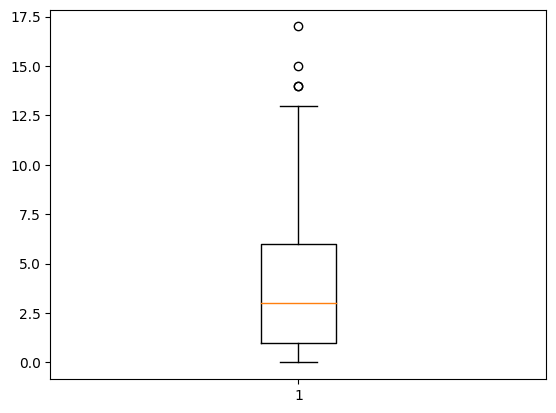

In [179]:
plt.boxplot(clean_features['Pregnancies'])

In [59]:
import pandas as pd
import numpy as np

def remove_outliers(df, method='iqr', trc='trim'):
    """
    Detects and removes outliers from all columns in the given DataFrame.
    
    Parameters:
    -----------
    df : pandas.DataFrame
        DataFrame containing the data to remove outliers from.
    method : str, optional
        Method used to detect outliers. Can be 'iqr' (default) or 'zscore'.
    trc : str, optional
        Method used to treat outliers. Can be 'trim' (default) or 'cap'.
    
    Returns:
    --------
    pandas.DataFrame
        DataFrame with the outliers removed.
    """
    # Define a helper function to calculate the IQR for a given column
    def calculate_iqr(col):
        q1 = np.percentile(col, 25)
        q3 = np.percentile(col, 75)
        iqr = q3 - q1
        return iqr

    # Define a helper function to calculate the z-score for a given column
    def calculate_zscore(col):
        zscore = np.abs((col - col.mean()) / col.std())
        return zscore

    # Define a helper function to treat outliers using trimming
    def treat_outliers_trim(col, iqr):
        lower = col.quantile(0.25) - 1.5 * iqr
        upper = col.quantile(0.75) + 1.5 * iqr
        col_trimmed = col[(col >= lower) & (col <= upper)]
        return col_trimmed

    # Define a helper function to treat outliers using capping
    def treat_outliers_cap(col, iqr):
        lower = col.quantile(0.25) - 1.5 * iqr
        upper = col.quantile(0.75) + 1.5 * iqr
        col_capped = col.clip(lower=lower, upper=upper)
        return col_capped

    # Loop through all columns and remove outliers
    threshold = 3
    for col in df.columns:
        if col != 'Outcome':
            if method == 'iqr':
                iqr = calculate_iqr(df[col])
                if trc == 'trim':
                    df[col] = treat_outliers_trim(df[col], iqr)
                elif trc == 'cap':
                    df[col] = treat_outliers_cap(df[col], iqr)
                else:
                    raise ValueError("Invalid value for trc. Expected 'trim' or 'cap'.")
            elif method == 'zscore':
                zscore = calculate_zscore(df[col])
                if trc == 'trim':
                    df[col] = df[col][zscore <= threshold]
                elif trc == 'cap':
                    df[col] = treat_outliers_cap(df[col], iqr)
                else:
                    raise ValueError("Invalid value for trc. Expected 'trim' or 'cap'.")
            else:
                raise ValueError("Invalid value for method. Expected 'iqr' or 'zscore'.")
    
    return df


In [80]:
df =dataset
clean_data = remove_outliers(df, method='iqr', trc='trim')

In [81]:
print(df)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin  BMI  \
0            NaN      NaN            NaN            NaN      NaN  NaN   
1            NaN      NaN            NaN            NaN      NaN  NaN   
2            NaN      NaN            NaN            NaN      NaN  NaN   
3            NaN      NaN            NaN            NaN      NaN  NaN   
4            NaN      NaN            NaN            NaN      NaN  NaN   
..           ...      ...            ...            ...      ...  ...   
763          NaN      NaN            NaN            NaN      NaN  NaN   
764          NaN      NaN            NaN            NaN      NaN  NaN   
765          NaN      NaN            NaN            NaN      NaN  NaN   
766          NaN      NaN            NaN            NaN      NaN  NaN   
767          NaN      NaN            NaN            NaN      NaN  NaN   

     DiabetesPedigreeFunction  Age  Outcome  
0                         NaN  NaN        1  
1                         NaN  